# 00.01 basics: polynomials & floating-point


## 00 numerical methods


<b>numerical methods</b>, as distinguished from other branches of mathematics and from computer science,
</br></br>

1. work with arbitrary real numbers (including rational <b>approximations</b> of irrational number) and
2. consider <b>cost</b> and
3. consider <b>accuracy</b>.$^{[1]}$
</br></br>

<i>this class will provide another way to express, to extend your math.</i>
</br>


numerical methods are the algorithms; <b>numerical analysis</b> is the study of their properties -- ie, accuracy, stability, convergence, efficiency, usw.
</br>


## 01 polynomials


<i>The most fundamental operations of arithmetic are <b>addition</b> and <b>multiplication</b>. These are also the operations needed to evaluate a polynomial $p(x)$ at a particular value $x$. It is no coincidence that polynomials are the basic building blocks for many computational techniques we will construct.$^{[2]}$</i>
</br>


### i) evaluation


eg: $\enspace p(x) = a_4x^4 + a_3x^3 + a_2x^2 + a_1x + a_0$.
</br>



with computational considerations:
</br>

1. <b>approximate</b> $p(x)$ at $x$ while
2. minimizing <b>operations</b> and
3. maximizing <b>accuracy</b>.
</br>


* method 1, step individually:
</br></br>

$p(x) = a_4\times x\times x\times x\times x + a_3\times x\times x\times x + a_2\times x\times x + a_1\times x + a_0 \mapsto 14$ operations.
</br></br>

* method 2, cache and reuse:
</br></br>

$x_2 = x\times x, x_3 = x_2\times x, x_4 = x_3\times x \mapsto 3$ operations;
</br>
$p_4 = a_4\times x_4, p_3 = a_x\times x_3, p_2 = a_2\times x_2, p_1 = a_1\times x_1 \mapsto 4$ operations;
</br>
$p(x) = p_4 + p_3 + p_2 + p_1 + a_0 \mapsto 4$ ops $\mapsto 11$ operations total.
</br></br>

* method 3, nested multiplication ([horners method](https://en.wikipedia.org/wiki/Horner%27s_method)):
</br></br>

$p(x) = (((a_4\times x + a_3)\times x + a_2)\times x + a_1)\times x + a_0 \mapsto 8$ operations.
</br>


## 02 binary notation

<b>binary notation:</b> $\quad\dots b_2b_1b_0.b_{-1}b_{-2} \dots$.
</br>


### i) conversion to decimal


$$
\Rightarrow
\dots b_2\times 2^2 + b_1\times 2^1 + b_0\times 2^0 + b_{-1}\times 2^{-1} + b_{-2}\times 2^{-2} \dots
$$

eg, $111.11_2$.
</br>


\begin{align}
  \text{integer:}&\quad 1\times 2^2 + 1\times 2^1 = 4 + 2 + 1 = 7 \\
  \\
  \text{fractional:}&\quad 1\times 2^{-1} + 1\times 2^{-2} = \tfrac{1}{2} + \tfrac{1}{4} = \tfrac{3}{4} \\
  \\
  &\quad\Downarrow \\
  \\
  111.11_2 &= 7_{10} + (\tfrac{3}{4})_{10} = 7.75_{10}.
\end{align}
</br>


### ii) decimal conversion to binary


eg, $111.25_{10}$.
</br>


\begin{align}
  \text{integer:}&\quad \tfrac{111}{2} = 55\, R\, 1 \\
  &\quad\rightarrow \tfrac{55}{2} = 27\, R\, 1 \\
  &\quad\rightarrow \tfrac{27}{2} = 13\, R\, 1 \\
  &\quad\rightarrow \tfrac{13}{2} = 6\, R\, 1 \\
  &\quad\rightarrow \tfrac{6}{2} = 3\, R\, 0 \\
  &\quad\rightarrow \tfrac{3}{2} = 1\, R\, 1 \\
  &\quad\rightarrow \tfrac{1}{2} = 0\, R\, 1 \\
  &\quad\rightarrow 11011111, \enspace\text{remainders in reverse order}  \\
  \\
  \text{fractional:}&\quad 0.25\times 2 = 0.50 + 0 \\
  &\quad\rightarrow 0.50\times 2 = 0.00 + 1 \\
  &\quad\rightarrow 0.01, \enspace\text{integers in order from left to right} \\
  \\
  &\quad\Downarrow \\
  \\
  111.25_{10} &= 1101111_2 + 0.01_2 = 11011111.01_2.
\end{align}
</br>


## 03 polynomials in the machine


### i) digital representation


\begin{align}
  x &= [d_{N-1},\dots,d_1,d_0] \quad\text{digital vector} \\
  \\
  &= d_{N-1}\times b^{N-1} + \dots + d_1\times b^1 + d_0\times b^0 \quad\text{with }{\bf precision\, N} \text{ and }{\bf base\, b}.
\end{align}

eg,
</br>

* base 10: $\quad 500_{10} = [5,0,0]; \quad [5] = 5_{10}$.
* base 02: $\quad [1,0,1] = 101_2 = 1\times 2^2 + 0\times 2^1 + 1\times 2^0 = 4 + 0 + 1 = 5_{10}$.

### ii) fixed/positional representation


using previous example,
</br>

* base 02: $101_2 = 1\times 2^2 + 0\times 2^1 + 1\times 2^0$
</br></br>

where RHS is <b>fixed representation</b> and LH subscript is the base or <b>radix</b> r. additionally, precision $N\ge 1, r\ge 2$ such that
</br></br>

$x = \sum^N d_kr^k$ has $r^N$ <b>permutations</b> and can also be written as
</br></br>

$r^N = \color{blue}{(r-1)}({\bf r^{N-1}}) + \color{red}{(r_{N-1})} = \color{blue}{[r-1]_{N-1}}[r]_{N-2}\dots[r]_1[r]_0\color{red}{[r]_{-1}[r]_{-2}\dots [r]_{N-2}[r]_{N-1}}$
</br>

where subscripts denote position wrt exponent.
</br>


eg, describe set where $N=3, r=2$.
</br></br>

\begin{align}
  \text{permutations:}&\quad r^N = 2^3 \Rightarrow \{000,001,010,011,100,101,110,111 \}; \\
  \\
  \text{magnitude:}&\quad \sum^{N-1} d_kr^k \le \sum^{N-1} (r-1)r^k = {\bf r^N - 1} \Rightarrow \enspace\text{range}^{[*]} \enspace [0,{\bf r^N - 1}].
\end{align}
</br>

[*] note: "range of magnitude" of $x$ is also "range" of $x$ bc representation of $x$ does not allow for sign.
</br>


### iii) sign


sign extends range.
</br>

* method 1: use position $d_{N-1}$ for sign.
</br>

\begin{align}
  x &= [\pm][d_{N-1},\dots,d_1,d_0] \quad\text{and} \\
  \\
  \text{permutations:}&\quad r^{N-1}\times 2; \\
  \\
  \text{range:}&\quad [-r^{N-1}+1,0),[0,+{\bf r^{N-1}-1}].
\end{align}


* method 2: use bias to obtain sign.
</br></br>

ie, all positions used for magnitude and bias is an operation.
</br></br>

\begin{align}
  x_{min} &= -B, x_{max} = r^N - B \\
  \\
  \text{range:}&\quad [x_{min},x_{max}] = [1-r^{N-1},r^{N-1}(r-1)]
\end{align}
</br>

with <b>standard bias</b> $B = {\bf r^{N-1} - 1}$.


eg, describe set where $N=3, r=2$ with standard bias.
</br></br>

\begin{align}
  B &= r^{N-1} - 1 = (2)^{(3-1)} - 1 = 4-1 = 3 \quad\text{and} \\
  \\
  \text{range:}&\quad [000,111]_2 \mapsto [0,7]_{10} - B = [-3,+4]_{10}.
\end{align}


## 04 floating-point


$x = M.b^E$, where <b>mantissa</b> $M$ is an integer represented by sign, magnitude, radix and <b>precision</b> $m$; <b>exponent</b> $E$ is an integer represented by bias and same radix. also, $M$ is <b>normalized</b> as $1.F$, where "$1.$" is implicit and <b>fractional</b> $F$ is
</br></br>

$$F = \sum^{m-2} d_kr^k, r\ge 2 \Rightarrow x = \pm 1.F\times b^E.$$


ie, same $r$ for $M,E$; $m$ includes sign; $m_E = N-m$; $B=r^{N-1}-1$ with bias power $N-1 = m_E - 1$. note: $b$ is the base of the exponent and not the base of the exponents power.
</br></br>

$$x = \color{green}{\pm}1.\color{blue}{F}\times \color{orange}{2}^{\color{red}{E}} = [\color{green}{s}] \overbrace{\underbrace{\overbrace{[\color{red}{\dots}][\color{red}{e_1}][\color{red}{e_0}]}^{m_E = N-m}}_{\color{red}{...} + \color{red}{e_1}\times \color{purple}{r}^1 + \color{red}{e_0}\times \color{purple}{r}^0} 1. \underbrace{\overbrace{[\color{blue}{f_1}][\color{blue}{f_2}][\color{blue}{\dots}]}^{m_F = m-sign}}_{\color{blue}{f_1}\times \color{purple}{r}^{-1} + \color{blue}{f_2}\times \color{purple}{r}^{-2} + \color{blue}{\dots}}}^{\text{positions allocated}},$$

##### example 01


$\enspace \mathbb{FP}(N=5,m=3,r=\color{purple}{3},b=\color{orange}{2})$ with standard bias.$^{[3]}$
</br>


$$x = \color{green}{\pm}1.\color{blue}{F}\times \color{orange}{2}^{\color{red}{E}} = [\color{green}{s}] \underbrace{\overbrace{[\color{red}{e_1}][\color{red}{e_0}]}^{m_E = 5-3=2} 1. \overbrace{[\color{blue}{f_1}][\color{blue}{f_2}]}^{m_F = 3-1=2}}_{\text{positions allocated}},$$
</br>

where
</br></br>

\begin{align}
  \color{green}{s} &\in\{0,1\} \\
  \\
  \color{blue}{f_j} &\in\{0,1,2\}_{\color{purple}{3}} \\
  \\
  &\Downarrow \\
  \\
  F_{magnitude} &= [0.00,0.22]_{\color{purple}{3}} \quad\text{and} \\
  \\
  \color{red}{e_i} &\in\{0,1,2\}_{\color{purple}{3}} \\
  \\
  B &= r^{N-1} - 1 \mapsto r^{m_E-1} - 1 = \color{purple}{3}^{2-1} - 1 = (3-1)_{10} = 2_{10} \\
  \\
  &\Downarrow \\
  \\
  E_{range} &= [00,22]_{\color{purple}{3}} - B = [0,8]_{10} - 2_{10} = [-2,6]_{10}.
\end{align}
</br>


eg,
</br></br>

\begin{align}
  x &= [\color{green}{0},\color{red}{1},\color{red}{1},\color{blue}{2},\color{blue}{0}]_{\mathbb{F}(5,3,3,2)} \\
  \\
  &= (-1)^{\color{green}{0}}\times 1.\color{blue}{20}_{\color{purple}{3}}\times \color{orange}{2}^{\color{red}{E}} \quad\text{where } \color{red}{E} = (\color{red}{11}_{\color{purple}{3}} - B) = (4-2)_{10} = \color{red}{2}_{10} \\
  \\
  &= +(1.+\color{blue}{2}\times \color{purple}{3}^{-1})_{10}\times \color{orange}{2}^{\color{red}{2}} = + (\tfrac{5}{3})\times 4 = +\tfrac{20}{3} = +6.\overline{6}.
\end{align}

</br>


##### example 02


$\enspace \mathbb{FP}(N=6,m=4,r=\color{purple}{3},b=\color{orange}{2})$ with standard bias.$^{[4]}$
</br>


$$x = \color{green}{\pm}1.\color{blue}{F}\times \color{orange}{2}^{\color{red}{E}} = [\color{green}{s}] \underbrace{\overbrace{[\color{red}{e}_1][\color{red}{e}_0]}^{m_E = 6-4=2} 1. \overbrace{[\color{blue}{f}_1][\color{blue}{f}_2][\color{blue}{f}_3]}^{m_F = 4-1=3}}_{\text{positions allocated}},$$
</br>

where
</br>

\begin{align}
  \color{green}{s} &\in\{0,1\}, \color{blue}{f}_j \in\{0,1,2\}_{\color{purple}{3}} \\
  \\
  &\Rightarrow F_{magnitude} = [0.000,0.222]_{\color{purple}{3}} \quad\text{and} \\
  \\
  \color{red}{e}_i &\in\{0,1,2\}_{\color{purple}{3}} \\
  \\
  B &= r^{N-1} - 1 \mapsto r^{m_E-1} - 1 = {\color{purple}{3}}^{2-1} - 1 = (3-1)_{10} = 2_{10} \\
  \\
  &\Rightarrow E_{range} = [00,22]_{\color{purple}{3}} - B = [0,8]_{10} - 2_{10} = [-2,6]_{10}.
\end{align}


ie,
</br></br>

\begin{align}
  |x_{min}| &= [\color{green}{0},\color{red}{0},\color{red}{0},\color{blue}{0},\color{blue}{0},\color{blue}{0}]_{\mathbb{F}(6,4,3,2)} \\
  \\
  &= (-1)^{\color{green}{0}}\times 1.\color{blue}{000}_{\color{purple}{3}}\times \color{orange}{2}^{\color{red}{E}}, \quad \color{red}{E} = (\color{red}{00}_{\color{purple}{3}} - B) = (0-2)_{10} = \color{red}{-2}_{10} \\
  \\
  &= +1.\color{blue}{0}_{10}\times \color{orange}{2}^{\color{red}{-2}} = +\tfrac{1}{4}. \\
  \\
  |x_{max}| &= [\color{green}{0},\color{red}{2},\color{red}{2},\color{blue}{2},\color{blue}{2},\color{blue}{2}]_{\mathbb{F}(6,4,3,2)} \\
  \\
  &= (-1)^{\color{green}{0}}\times 1.\color{blue}{222}_{\color{purple}{3}}\times \color{orange}{2}^{\color{red}{E}}, \quad \color{red}{E} = (\color{red}{22}_{\color{purple}{3}} - B) = (8-2)_{10} = \color{red}{6}_{10} \\
  \\
  &= +[1.+(\color{blue}{2}\times {\color{purple}{3}}^{-1} + \color{blue}{2}\times {\color{purple}{3}}^{-2} + \color{blue}{2}\times {\color{purple}{3}}^{-3})_{10}]\times \color{orange}{2}^{\color{red}{6}} = +(1+\tfrac{26}{27})\times 64 \approx +125.\overline{629}. \\
\end{align}
</br>


### i) denormalized vs normalized

a base-2 floating-point number will always start with "$1$", so its inclusion is implied. explicitly, $1\times 2^0$ is a given so the position it might have used is given over to the fractional part of the mantissa. that is the normalized mantissa.
</br>

however, if the biased exponent is zero, the mantissa is <b>denormalized</b>. ie, there is no implicit "$1$". <i>(note: this is a feature of the standard, IEEE-754 and not necessarily a feature of other FPS.)</i>
</br></br>

\begin{align}
  \text{eg, } B_{\text{IEEE 754}} &= 126 \Rightarrow [0][00000000]0.[00010…0] \\
  &= +(1\times 2^{-4})\times (2^{0-126}) = +2^{-130}.^{[5]}
\end{align}

### ii) IEEE 754

the standard is [IEEE](https://www.ieee.org/) [754](https://en.wikipedia.org/wiki/IEEE_754)-[2019](https://standards.ieee.org/ieee/754/6210/), $\mathbb{FP}(N-1,m,r,b) = \mathbb{FP}(64,53,2,2)$, where 32-bit is single precision and 64-bit is double-precision.

### iii)  hexadecimal vs binary

IEEE 754 stores floating-point numbers using binary format; however, hexadecimal ([base 16](https://en.wikipedia.org/wiki/Hexadecimal)) representation of those bits is considered more human friendly.
</br>

consider the approximation of $\pi$:
```
π = 3.14159265358979

IEEE 754: 01000000000100100000111110111010111

Sign Bit: 0
Exponent: 10000000 (128 in decimal, after subtracting the bias of 127)
Mantissa: 00100100000111110111010111

Hex     : 0x40490FDB

Sign Bit: 0
Hex Flag: x
Exponent: 40
Mantissa: 490FDB
```

### iv) observations


* gaps between adjacent numbers scale with magnitude of number represented. (ie, consider negative exponents vs positive exponents.)



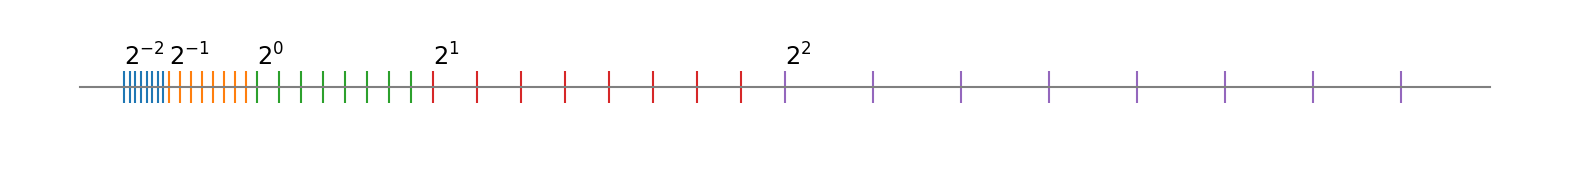

In [ ]:
if __name__ == "__main__":
  import matplotlib.pyplot as plt
  import numpy as np

  es = [-2,-1,0,1,2]
  ms = np.arange(1,2,0.125) # implicit 1 + 3 position binary fractional
  zeros = np.zeros_like(ms)

  plt.figure(figsize=(20,2))
  plt.plot([0,8],[0,0],color="0.5")

  for e in es:
    xs = ms*pow(2,e)  # + mantissa x base^e
    plt.scatter(xs,zeros,marker="|",s=500)
    s_e = "$2^{" + f"{e}" + "}$"
    plt.text(xs.min(),.015,s_e,size="xx-large")

  plt.axis("off")
  plt.show()


* machine epsilon, $\epsilon_{\text{mach}}$, is the gap between $1$ and the next FPN.
* unit roundoff, $\mu_{\text{mach}} = \tfrac{1}{2}\, \epsilon_{\text{mach}}$.
* for all $x$ there exists a floating-point $x'$ such that $|x-x'| \le \mu_{\text{mach}}\times |x|$.
* when $M$ normalized, zero represented by $\epsilon = \epsilon_{\text{min}} - 1$.
* $\pm\infty$ returned when and operation overflows.
* $\tfrac{x}{\pm\infty}$ returns $0$ and $\tfrac{x}{0}$ returns $\pm\infty$.
* "not a number" (NaN) is returned if no well-defined finite or infinite result.
* [und so weiter](https://dict.leo.org/german-english/und%20so%20weiter).
</br></br>
</br></br></br></br></br></br></br></br>
</br></br></br></br></br></br></br></br>

## resources

* horners method [@wiki](https://en.wikipedia.org/wiki/Horner%27s_method)
* telescoping sum [@wiki](https://en.wikipedia.org/wiki/Telescoping_series)

* floating-point [@wiki](https://en.wikipedia.org/wiki/Floating-point_arithmetic) [@youtube #1](https://www.youtube.com/watch?v=dQhj5RGtag0) [#2-pt1](https://www.youtube.com/watch?v=gc1Nl3mmCuY) [#2-pt2](https://www.youtube.com/watch?v=b2FgF2sUoS8)
* unit in last place (ulp) [@wiki](https://en.wikipedia.org/wiki/Unit_in_the_last_place)
* machine epsilon [@wiki](https://en.wikipedia.org/wiki/Machine_epsilon)

* [IEEE](https://www.ieee.org/) [754](https://en.wikipedia.org/wiki/IEEE_754)-[2019](https://standards.ieee.org/ieee/754/6210/)

## references

1. johnson, sg. <i>[18.335, introduction to numerical methods](https://ocw.mit.edu/courses/18-335j-introduction-to-numerical-methods-spring-2019/),</i> mit.ocw, spring 2015.
2. sauer, tim. <i>numerical analysis, 2nd edition</i>, pearson education, 2012, p1.
3. martinez, vincent. <i>math 685</i>, hunter, spring 2023.
4. <i>ibid</i>.
5. nerdfirst. <i>[denormal numbers](https://www.youtube.com/watch?v=b2FgF2sUoS8)</i>, [0612 tv](https://www.youtube.com/@NERDfirst), 2020.